<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Анализ-результатов" data-toc-modified-id="Анализ-результатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ результатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Сбалансирование-веса-классов" data-toc-modified-id="Сбалансирование-веса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сбалансирование веса классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога-вероятности" data-toc-modified-id="Изменение-порога-вероятности-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога вероятности</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

**Задание**

>Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
<br><br>
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
<br><br>
Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.
<br><br>
Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

**Описание данных**

Источник данных: [Kaggle.com](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling "Bank customer churn modeling")

Датасет находится в `datasets/Churn.csv`

| столбец   | описание
| --------- | :--------
| RowNumber | индекс строки в данных
| CustomerId | уникальный идентификатор клиента
| Surname | фамилия
| CreditScore | кредитный рейтинг
| Geography | страна проживания
| Gender | пол
| Age | возраст
| Tenure | сколько лет человек является клиентом банка
| Balance | баланс на счёте
| NumOfProducts | количество продуктов банка, используемых клиентом
| HasCrCard | наличие кредитной карты
| IsActiveMember | активность клиента
| EstimatedSalary | предполагаемая зарплата
| Exited | факт ухода клиента

**Решение**

## Подготовка данных

Импортируем библиотеки.

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_auc_score, f1_score, roc_curve,
                             precision_recall_fscore_support)

Сохраним данные из файла CSV в переменную data и посмотрим на общую информацию о датасете.

In [2]:
data = pd.read_csv('datasets/Churn.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Уже сейчас можно сделать несколько замечаний:
- Данные в первых трех столбцах *RowNumber*, *CustomerId* и *Surname* не могут влиять на решения клиента. *RowNumber* - дублирует индекс строки, *CustomerId* представляет идентификационный номер клиента и *Surname* - фамилию клиента. Эти столбцы удалим.


- Столбец *Tenure* содержит пропуски. Прежде, чем обучать модели на этих данных пропуски нужно обработать.


- Столбцы *Gender* и *Geography* представляют категории, к которым относятся клиенты. Категориальные данные необходимо выразить в числовом виде.

Проверим наличие строк дубликатов. 

In [3]:
data.duplicated().sum()

0

Рассмотрим *Geography* и *Gender* подробнее.

In [4]:
display(data['Gender'].value_counts(), data['Geography'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Уникальных значений в этих столбцах немного. Их можно закодировать методом One-Hot Encoding (OHE). Прежде, чем преобразовывать данные обратимся к еще одному столбецу - *Tenure*. Пропуски в этом столбце заполним числом, отличным от всех остальных, таким образом отметим, что эти строки не имеют значения. Заполним пропуски значением -1.

In [5]:
data['Tenure'].fillna(-1, inplace=True)

Выделим из датасета целевой признак *Exited* и избавимся от лишних данных.

In [6]:
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

Исследуем зависимость признаков друг от друга. Составим матрицу корреляции признаков.

In [7]:
features.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.003552,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.006315,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.003552,-0.006315,1.000000,-0.005400,0.009661,0.020132,-0.024462,0.011174
Balance,0.006268,0.028308,-0.005400,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.009661,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.020132,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.024462,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.011174,0.012797,0.014204,-0.009933,-0.011421,1.000000


Сильная корреляция признаков отсутствует.

Воспользуемся техникой прямого кодирования OHE. Преобразуем категориальные признаки в числовые и кодируем признак *Tenure*.

In [8]:
features = pd.get_dummies(features,
                          drop_first=True,
                          columns=['Tenure', 'Gender', 'Geography'])

In [9]:
print('features:', features.shape, '\ntarget:', target.shape)

features: (10000, 21) 
target: (10000,)


In [10]:
features.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure_0.0,Tenure_1.0,Tenure_2.0,...,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,502,42,159660.80,3,1,0,113931.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Число признаков увеличилось до 21. Разделим датасет на обучающую, валидационную и тестовую выборки в соотношении 6-2-2.

In [11]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

Масштабируем численные данные методом стандартизации. 

In [12]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [13]:
pd.options.mode.chained_assignment = None

features_train[:] = scaler.transform(features_train[:])
features_valid[:] = scaler.transform(features_valid[:])
features_test[:] = scaler.transform(features_test[:]) 

In [14]:
print('Shapes\nTraining set: {}\nTesting set: {}\nValidation set: {}'
      .format(features_train.shape, features_test.shape, features_valid.shape))

Shapes
Training set: (6000, 21)
Testing set: (2000, 21)
Validation set: (2000, 21)


Данные были правильно разделены в соотношении 60-20-20. Провели кодировку категориальных признаков и стандартизацию численных признаков. **Данные подготовлены для обучения моделей.**

## Исследование задачи

Целевой признак - *Exited*, который может принимать значения 1 или 0, что отражает факт ухода клиента из банка. **Перед нами задача бинарной классификации**. Проверим насколько сбалансированы классы в выборке.

In [15]:
target_train.value_counts(normalize=True).round(3) * 100

0    80.1
1    19.9
Name: Exited, dtype: float64

Соотношение классов 20 - 80. Классы не являются сбалансированными. Обучим модели на несбалансированной выборке и получим метрики таких моделей. В качестве алгоритмов обучения используем Random Forest Classifier и Logistic Regression. На несбалансированной выборке будем использовать метрику F1, как определяющую качество модели.

### Random Forest

Обучение моделей выполняется одной и той же последовательность действий. Чтобы избавиться от избыточности кода, напишем отдельную функцию для обучения моделей.

In [16]:
def train_model(model, parameters, features=features_train, target=target_train):
    labels = ['F1', 'AUC-ROC'] + sorted(list(parameters.keys()))
    values = []
    
    for params in ParameterGrid(parameters):
        model.set_params(**params)
        model.fit(features, target)
        
        probabilities = model.predict_proba(features_valid)[:, 1]
        predictions = model.predict(features_valid)
        
        f1 = round(f1_score(target_valid, predictions), 4)
        roc_auc = round(roc_auc_score(target_valid, probabilities), 4)
        values.append([f1, roc_auc] + list(params.values()))
    
    result = pd.DataFrame(data=values, columns=labels).sort_values('F1', ascending=False)
    display(result.head())
    best_score = result.iloc[0, 0]
    
    # return model with params when max f1 reached, fitted on train set
    model = model.set_params(**(result.iloc[0, 2:].astype('int', errors='ignore').to_dict()))
    model.fit(features, target)
    return model, best_score

Подберем для алгоритма Random Forest гиперпараметры для количества и глубины деревьев.

In [17]:
params = {'max_depth': range(4, 24, 3),
          'n_estimators': range(10, 81, 10)}

model = RandomForestClassifier(random_state=12345)
forest_model, forest_score = train_model(model, params)

,F1,AUC-ROC,max_depth,n_estimators
42,0.5925,0.8344,19,30
55,0.5913,0.8407,22,80
53,0.5897,0.8399,22,60
54,0.5893,0.8404,22,70
43,0.5891,0.8404,19,40


Максимальное значение F1 - 0.5925, достигнуто при количестве деревьев 30 и их максимальной глубине 19.

### Linear Regression

Получим результат для модели с алгоритмом обучения Logistic Regression.

In [18]:
params = {'solver': ['liblinear']}

model = LogisticRegression(random_state=12345)
regression_model, regres_score = train_model(model, params)

,F1,AUC-ROC,solver
0,0.3283,0.7598,liblinear


Метрика F1 линейной модели значительно хуже, чем у случайного леса.

### Анализ результатов

Метрика F1 лучше у модели с алгоритмом Random Forest с гиперпараметрами количество оценщиков 30 и глубиной деревьев 19. Создадим таблицу *scores* и запишем в нее полученное значения F1 на валидационной выборки.

In [19]:
scores = {}
scores['Unbalanced']= forest_score
forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

Сведем метрики в одну таблицу и построим матрицу ошибок для этой модели.

In [20]:
def confusion_heatmap(features, target, model, threshold=0.5):
    probabilities = model.predict_proba(features)[:, 1]
    predictions = probabilities > threshold
    
    # confusion matrix
    confusion_data = pd.DataFrame(columns=np.unique(target), 
                                  index=np.unique(predictions), 
                                  data=confusion_matrix(target, predictions))
    
    # plot heatmap of confusion matrix
    sns.heatmap(confusion_data,
                linewidths=.5, 
                cmap='Blues', 
                annot=True, 
                fmt='2.0f', 
                center=len(target) / 10, 
                annot_kws={'fontsize':15})
    plt.xlabel('predictions')
    plt.ylabel('targets')
    
    # print metrics 
    metrics = list(precision_recall_fscore_support(target, predictions, average='binary'))[:3]
    metrics.append(accuracy_score(target, predictions))
    metrics.append(roc_auc_score(target, probabilities))
    print('{:.4f} - Precision\n{:.4f} - Recall\n{:.4f} - F1\n{:.4f} - Accuracy\n{:.4f} - AUC-ROC'.format(*metrics))

RandomForest
0.7976 - Precision
0.4713 - Recall
0.5925 - F1
0.8645 - Accuracy
0.8344 - AUC-ROC


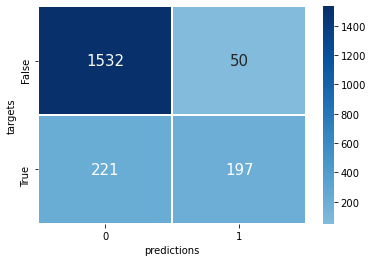

In [21]:
print('RandomForest')
confusion_heatmap(features_valid, target_valid, forest_model)

### Вывод

Мы получили модель, обученную алгоритмом Random Forest, с метрикой F1 на валидационной выборке равной 0.597. Метрика Recall является все еще очень низкой, это означает, что доля истинно положительных ответов меньше доли ложноотрицательных. Модель плохо предсказывает положительные исходы. Причиной является **дисбаланс классов в обучающей выборке**. Далее воспользуемся рядом методов, позволяющих избавиться от этой проблемы.

## Борьба с дисбалансом

### Сбалансирование веса классов

При обучении модели в параметрах алгоритма можно задать сбалансированный вес класса. Алгоритм будет задавть вес класса пропорционально частоте его появления.

Обучим алгоритм **Linear Regression**.

In [22]:
params = {'class_weight': ['balanced']}

regression_model, regres_score = train_model(regression_model, params)

,F1,AUC-ROC,class_weight
0,0.4884,0.7642,balanced


Сбалансирование веса увеличило F1 модели Logistic Regression до 0.488.

Попробуем обучить модель **Random Forest**.

In [23]:
params = {'class_weight': ['balanced']}

forest_model, forest_score = train_model(forest_model, params)

,F1,AUC-ROC,class_weight
0,0.5784,0.8386,balanced


Максимальное значение F1 у модели случайного леса. Сохраним его в таблицу *scores*.

In [24]:
scores['Classweighted'] = forest_score

RandomForest classweighted
0.7950 - Precision
0.4545 - Recall
0.5784 - F1
0.8615 - Accuracy
0.8386 - AUC-ROC


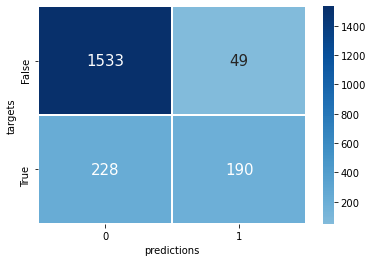

In [25]:
print('RandomForest classweighted')
confusion_heatmap(features_valid, target_valid, forest_model)

Мы не получили значимых изменений в предсказании.

### Увеличение выборки

Воспользуемся методом Upsampling. Чтобы сбалансировать классы в обучающей выборке - увеличим число строк с положительным классом.

In [26]:
def upsample(features, target, repeat):
    # split features and target by class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # increase the number of rows class one by *repeat* times 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # shuffle features and target
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print('Upsampled Training Set\nFeatures:', features_upsampled.shape, '\nTarget:', target_upsampled.shape)

Upsampled Training Set
Features: (9588, 21) 
Target: (9588,)


In [28]:
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

Обучающая выборка выросла более чем в половину, а соотношение классов практически сравнялось. Подберем параметры для **Random Forest** заново и определим метрики наилучшего алгоритма. За основную метрику будем считать F1.

In [29]:
params = {'max_depth': range(4, 24, 3),
          'n_estimators': range(10, 81, 10)}

model = RandomForestClassifier(random_state=12345)
forest_model_upsampled, forest_score = train_model(model, params, features_upsampled, target_upsampled)

,F1,AUC-ROC,max_depth,n_estimators
17,0.6347,0.8490,10,20
18,0.6328,0.8506,10,30
19,0.6312,0.8520,10,40
20,0.6292,0.8518,10,50
23,0.6280,0.8528,10,80


F1 модели, обученной на увеличенной выборке, вырос до 0.635, это хороший результат. Метрика AUC-ROC также показывает высокие значения.

**Linear Regression**

In [30]:
params = {'solver': ['liblinear']}

model = LogisticRegression(random_state=12345)
regression_model, regres_score = train_model(model, params, features_upsampled, target_upsampled)

,F1,AUC-ROC,solver
0,0.4901,0.7642,liblinear


Модель, обученная алгоритмом Logistic Regression, увеличила метрику F1 до 0.49. Но для поставленной задачи это слишком мало.

Сохраним метрику F1 для случайного леса в таблицу *score*.

In [31]:
scores['Upsampled'] = forest_score

Посмотрим на метрики и матрицу ошибок модели Random Forest.

RandomForest upsampled
0.7950 - Precision
0.4545 - Recall
0.5784 - F1
0.8615 - Accuracy
0.8386 - AUC-ROC


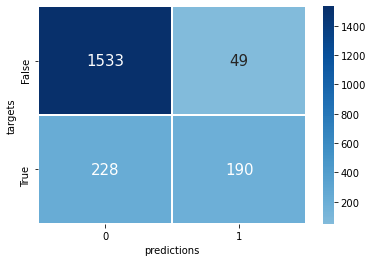

In [32]:
print('RandomForest upsampled')
confusion_heatmap(features_valid, target_valid, forest_model)

Выросла метрика F1, также сильно выросла полнота предсказаний. Модели правильно предсказывает больше 2/3 положительных результатов. Вместе с ростом полноты мы можем наблюдать падение точности предсказания, а именно немногим меньше половины положительных предсказаний оказались ложными.

### Уменьшение выборки

Для балансировки классов применим другой метод - уменьшения выборки (downsampling). Уменьшим в обучающей выборке количество строк с классом 0.

In [33]:
def downsample(features, target, fraction):
    # split features and target by class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # decrease the number of rows class zero by *fraction* times 
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    # shuffle features and target
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [34]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print('Downsampled Training Set\nFeatures:', features_downsampled.shape, '\nTarget:', target_downsampled.shape)

Downsampled Training Set
Features: (2397, 21) 
Target: (2397,)


In [35]:
target_downsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

Число объектов в обучающей выборке уменьшилось более чем вдвое - 2397, а классы оказались сбалансированны. Обучим модели на новых данных.

**Random Forest**

In [36]:
params = {'max_depth': range(4, 24, 3),
          'n_estimators': range(10, 81, 10)}

model = RandomForestClassifier(random_state=12345)
forest_model_downsampled, forest_score = train_model(model, params, features_downsampled, target_downsampled)

,F1,AUC-ROC,max_depth,n_estimators
12,0.6090,0.8458,7,50
9,0.6065,0.8454,7,20
11,0.6021,0.8442,7,40
19,0.5996,0.8447,10,40
23,0.5991,0.8466,10,80


**Logistic Regression**

In [37]:
params = {'solver': ['liblinear']}

model = LogisticRegression(random_state=12345)
regression_model, regres_score = train_model(model, params, features_downsampled, target_downsampled)

,F1,AUC-ROC,solver
0,0.482,0.762,liblinear


При обучении на уменьшенной выборке метрики F1 оказались немного ниже, чем на увеличенной. Logistic Regression дает результаты худшие, чем Random Forest и хуже, чем заявленно в требованиях. Далее мы будем работать с алгоритмом Random Forest. 

In [38]:
scores['Downsampled'] = forest_score

Посмотрим метрики и матрицу ошибок для модели Random Forest.

RandomForest downsampled
0.7950 - Precision
0.4545 - Recall
0.5784 - F1
0.8615 - Accuracy
0.8386 - AUC-ROC


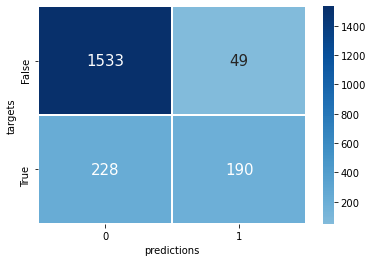

In [39]:
print('RandomForest downsampled')
confusion_heatmap(features_valid, target_valid, forest_model)

Метрика F1 стала меньше - 0.6, но полнота предсказаний увеличилась.

На уменьшенной выборке модель смогла предсказать еще большую долю клиентов, которые покинули банк, но достигла этого ценой увеличения ложных срабатываний. С точки зрения бизнеса такая модель может оказаться полезнее, так как сохранит большее количество клиентов для банка. В то же время банку придется потратить больше ресурсов на удержание клиентов, так как модель чаще предсказывает уход клиента. Так как за основную метрику мы приняли F1, то на ее основе можно сделать вывод, что метод увеличения выборки дал лучший результат. Будем использовать этот метод для дальнейшего обучения моделей.

### Изменение порога вероятности

Попробуем изменить порог вероятности положительного класса и посмотрим как разные варианты влияют на метрики модели. За алгорит обучения принимаем Random Forest, с гиперпараметрами, полученными при обучении с увеличенной выборке. Обучать модель будем на увеличенной выборке. Порог вероятности будем изменять от 0.4 до 0.7.

In [40]:
probabilities_valid = forest_model_upsampled.predict_proba(features_valid)[:, 1]

for threshold in np.arange(0.4, 0.7, 0.02):
    predicted_valid = probabilities_valid > threshold
    metrics = tuple(precision_recall_fscore_support(target_valid, predicted_valid, average='binary'))[:3]

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.5f}".format(
        threshold, *metrics))

Threshold = 0.40 | Precision = 0.446, Recall = 0.794, F1 = 0.57143
Threshold = 0.42 | Precision = 0.470, Recall = 0.778, F1 = 0.58559
Threshold = 0.44 | Precision = 0.499, Recall = 0.761, F1 = 0.60284
Threshold = 0.46 | Precision = 0.515, Recall = 0.737, F1 = 0.60630
Threshold = 0.48 | Precision = 0.546, Recall = 0.727, F1 = 0.62359
Threshold = 0.50 | Precision = 0.572, Recall = 0.713, F1 = 0.63472
Threshold = 0.52 | Precision = 0.596, Recall = 0.689, F1 = 0.63929
Threshold = 0.54 | Precision = 0.616, Recall = 0.660, F1 = 0.63741
Threshold = 0.56 | Precision = 0.629, Recall = 0.624, F1 = 0.62665
Threshold = 0.58 | Precision = 0.651, Recall = 0.603, F1 = 0.62609
Threshold = 0.60 | Precision = 0.661, Recall = 0.579, F1 = 0.61735
Threshold = 0.62 | Precision = 0.682, Recall = 0.548, F1 = 0.60743
Threshold = 0.64 | Precision = 0.706, Recall = 0.524, F1 = 0.60165
Threshold = 0.66 | Precision = 0.731, Recall = 0.495, F1 = 0.59058
Threshold = 0.68 | Precision = 0.741, Recall = 0.471, F1 = 0.5

Максимальная F1 равна 0.639, приходится на порог 0.52.

Построим график ошибок модели, отметим на ней кривую для случайной модели.

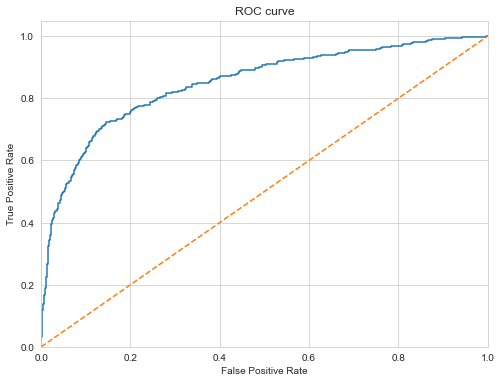

In [41]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

**AUC-ROC модели на увеличенной выборке равен 0.849, максимальная F1 равна 0.639**, при пороге положительной вероятности 0.52. Полученная модель имеет хорошие предсказательные качества. Исследуем модель на тестовой выборке.

### Вывод

Для сбалансирования классов в обучающей выборке были использованы несколько разных методов. Хороший результат показал метод увеличения выборки, метрика F1 равна 0.635. Методом варьирования порога вероятности положительного исхода метрика F1 на валидационной выборке была еще увеличена до 0.639. Метрика AUC-ROC модели показывает высокий результат. Выбранные параметры будем использовать в исследовании модели на тестовой выборке.

## Тестирование модели

Объединим обучающую и валидационную выборки. Это позволить увеличить обучающую выборку и улучшит качество модели.

In [42]:
features_train_valid = pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid])

Сбалансируем классы методом увеличения выборки.

In [43]:
features_upsampled, target_upsampled = upsample(features_train_valid, target_train_valid, 4)
print('Training and Valid Set\nFeatures:', features_upsampled.shape, '\nTarget:', target_upsampled.shape)

Training and Valid Set
Features: (12842, 21) 
Target: (12842,)


In [44]:
target_upsampled.value_counts(normalize=True)

1    0.502725
0    0.497275
Name: Exited, dtype: float64

Размер обучающей выборки увеличился до 12842 объектов, классы сбалансированы. Обучим модель Random Forest на объединенных данных.

In [45]:
model = forest_model_upsampled
model.fit(features_upsampled, target_upsampled)
scores['Test'] = f1_score(target_test, model.predict(features_test))
print('F1 на тестовой выборке:', round(scores['Test'], 4))

F1 на тестовой выборке: 0.6108


Получим предсказания модели на тестовых данных. Зададим порог вероятности равным 0.52. Построим график ошибок, матрицу ошибок и основные метрики.

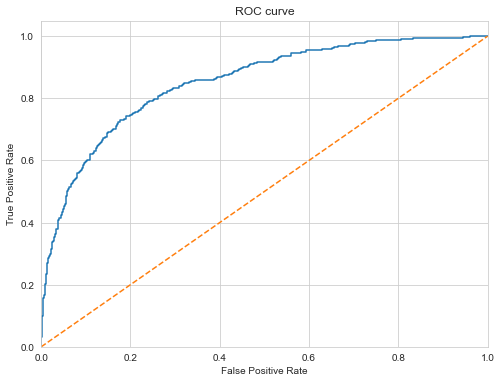

In [46]:
probabilities_test = model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

RandomForest upsampled, Test set
0.5796 - Precision
0.6454 - Recall
0.6107 - F1
0.8260 - Accuracy
0.8513 - AUC-ROC


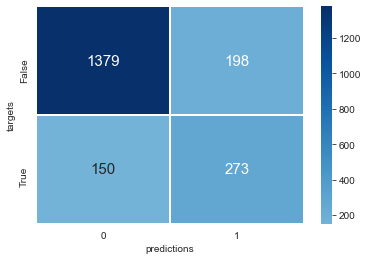

In [47]:
print('RandomForest upsampled, Test set')
confusion_heatmap(features_test, target_test, model, threshold=0.52)

**На тестовой выборке получили метрику F1 равную 0.611**, этот результат выше 0.59 указанного в задании. Высокое значение метрики AUC-ROC подтверждает качество модели. В результате проведенной работы получили модель способную эффективно предсказывать отток клиентов из банка.

Соберем результаты F1 метрики для всех обученных моделей RandomForest и построим диаграмму.

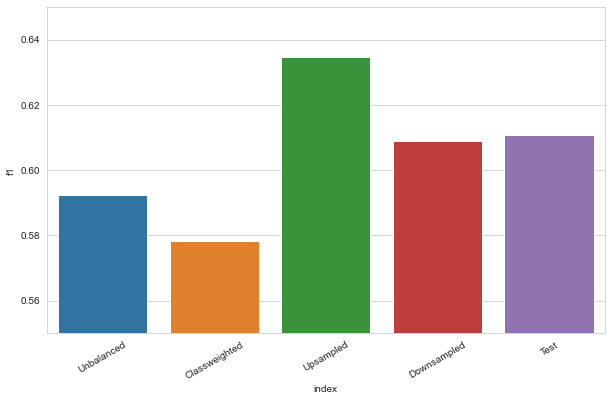

In [48]:
scores_df = pd.DataFrame(data=scores, index=['f1']).T.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='f1', data=scores_df)
plt.xticks(rotation=30)
plt.ylim(0.55, 0.65)
plt.show()

Составим таблицу важности признаков в полученной модели. 

In [49]:
importance = model.feature_importances_.tolist()
features_list = features_upsampled.columns.tolist()

features_importance = pd.DataFrame({'feature':features_list, 'importance':importance}).sort_values(
    by='importance', ascending=False).reset_index(drop=True)

Посмотрим на признаки важность которых более 1% и построим диаграмму важности признаков.

In [50]:
features_importance[features_importance['importance'] > 0.01]

,feature,importance
0,Age,0.350875
1,NumOfProducts,0.231487
2,Balance,0.092617
3,IsActiveMember,0.066972
4,EstimatedSalary,0.058455
5,Geography_Germany,0.057294
6,CreditScore,0.057175
7,Gender_Male,0.026238


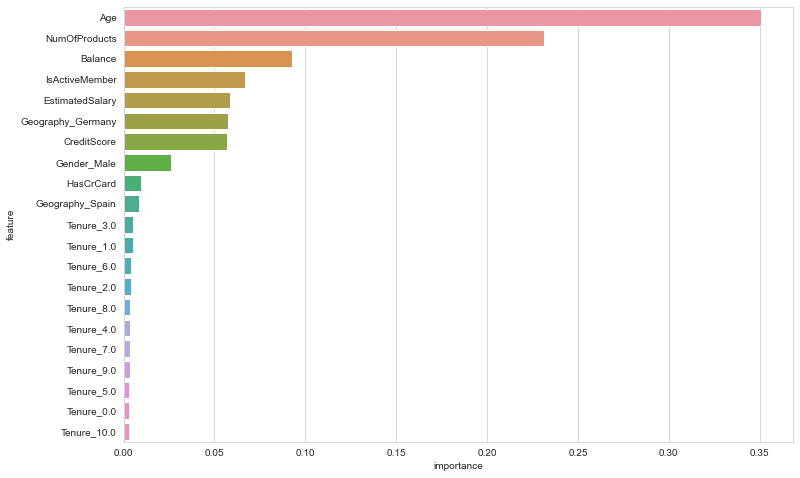

In [51]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y="feature", x="importance", data=features_importance)

Наиболее влиятельными признаками оказались *возраст* и *количество продуктов*, в совокупности имеют вес более 58%. Вес признака *Tenure*, который мы закодировали в 11 столбцах, оказался распределен по всем столбцам.

## Вывод

Целевой признак в исходном наборе данных оказался несбалансирован - один класс встречался гораздо чаще, чем другой. Малое число объектов одного класса приводит к тому, что модель недообучается распознавать этот класс. В работе был применен ряд методов, выравнивающих наличие классов в выборке:
- балансировка весов;
- увеличение выборки с редким классом;
- уменьшение выборки с частым классом.

Лучший результат дал метод увеличения выборки. Он позволил модели более полно обучиться распознавать оба класса. Выбор типа модели производился из двух вариантов: линейной регрессии и случайного леса. **Лучшие значения метрики F1 показала модель случайного леса**.

В результате была получена модель случайного леса с настроенными гиперпараметрами. Модель была обучена на увеличенной выборке. **Предсказания выполненные на тестовой выборке оценены метрикой F1 равной 0.611**. Полученную модель можно использовать для дальнейшей разработки предсказательной системы.